In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
df_true=pd.read_csv("True.csv")
df_fake=pd.read_csv("Fake.csv")

In [3]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
print("true news dataframe shape is :",df_true.shape)
print("true fake dataframe shape is :",df_fake.shape)


true news dataframe shape is : (21417, 4)
true fake dataframe shape is : (23481, 4)


In [6]:
df_true['class']=1
df_fake['class']=0

In [7]:
df=pd.concat([df_true,df_fake])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
df.duplicated().sum()

209

In [10]:
df.drop_duplicates(inplace= True)


In [11]:
df.shape

(44689, 5)

In [12]:
df.duplicated().sum()

0

52.536418357985184
47.463581642014816
__________________________________________________


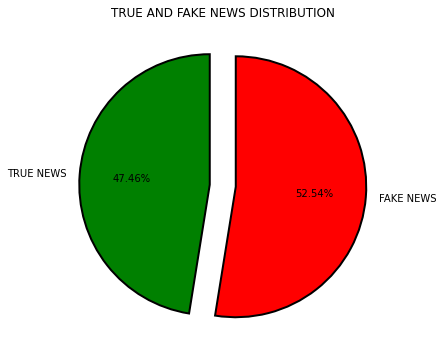

In [13]:

fake_news = df['class'].value_counts()[0]
true_news = df['class'].value_counts()[1]
total_count = len(df)
fake_news_percentage = (fake_news / total_count) * 100
true_news_percentage = (true_news / total_count) * 100

print(fake_news_percentage)
print(true_news_percentage)
value=[true_news_percentage,fake_news_percentage]

plt.figure(figsize=(6,6))
plt.pie(value, labels=['TRUE NEWS', 'FAKE NEWS'],
        autopct='%1.2f%%',
        startangle=90,
        explode=(0.1, 0.1),
        colors='g''r',  
        wedgeprops={'edgecolor': 'black', 'linewidth':2,})
plt.title('TRUE AND FAKE NEWS DISTRIBUTION')
print("__________________________________________________")




subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6838
politicsNews       11220
worldnews           9991
Name: text, dtype: int64


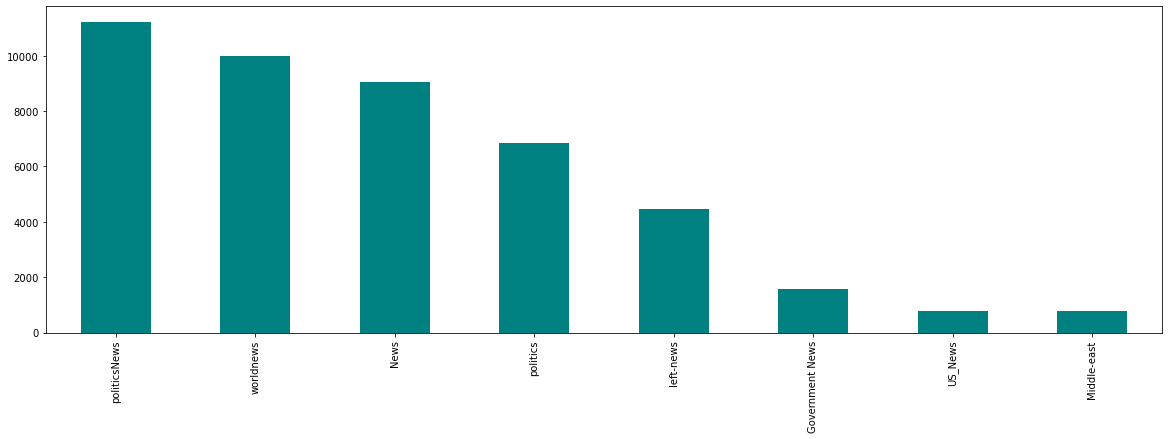

In [14]:
print(df.groupby('subject')['text'].count())
plt.figure(figsize=(20,6))
df['subject'].value_counts().plot(kind='bar',color='#008080')
plt.xticks(rotation='vertical')
plt.show()


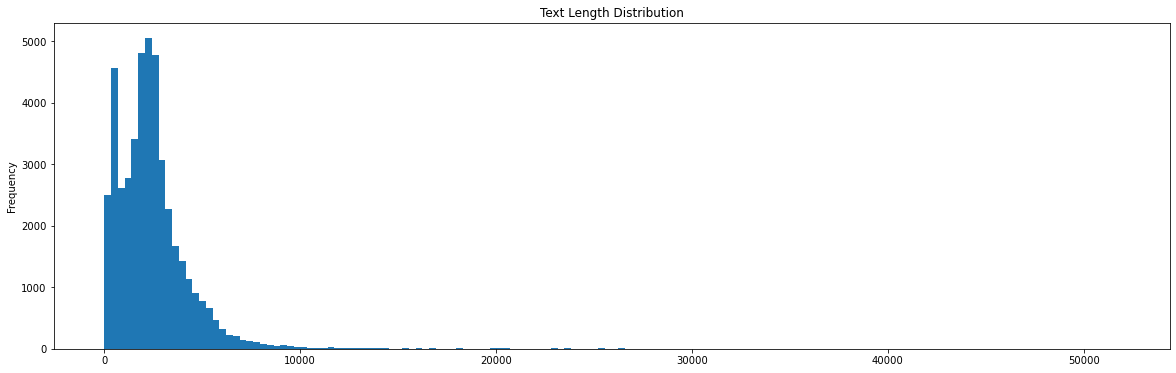

In [15]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(20,6))
df['text_length'].plot(kind='hist', bins=150, title='Text Length Distribution')
plt.show()


In [16]:
def calculate_avg_word_length(text):
    words = text.split()
    total_word_length = sum(len(word) for word in words)
    total_words = len(words)
    
    if total_words == 0:  
        return 0
    else:
        return total_word_length / total_words

df['avg_word_length'] = df['text'].apply(calculate_avg_word_length)


In [17]:
df = df.sample(frac=1)

In [18]:
df.reset_index(inplace=True)
df.drop(["index"],axis=1, inplace=True)

In [19]:
df = df.drop(["title","subject","date"], axis=1)

In [20]:
df

,text,class,text_length,avg_word_length
0,BUENOS AIRES (Reuters) - Argentina s lower hou...,1,2113,5.258929
1,Rachel Maddow decided to scrap a segment and g...,0,2788,4.750000
2,(Reuters) - U.S. oil and gas executives bet bi...,1,4989,5.001203
3,KIGALI (Reuters) - The mother and sister of a ...,1,2272,5.032000
4,Justice the Obama way Instead of investigating...,0,2502,5.644385
...,...,...,...,...
44684,"On Monday, Donald Trump unveiled his much anti...",0,3107,5.391304
44685,ABOARD AIR FORCE ONE (Reuters) - The White Hou...,1,628,5.217822
44686,Proof that sanity still exists on college camp...,0,1660,5.160448
44687,WASHINGTON (Reuters) - Senator Susan Collins i...,1,4210,5.082370


In [21]:
x = df["text"]
y = df["class"]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lr = LogisticRegression()
lr.fit(xv_train,y_train)
logistic_y_pred=lr.predict(xv_test)
accuracy_score_lr=accuracy_score(logistic_y_pred,y_test)
print("____predicted values are____ :\n\n{}".format(logistic_y_pred))
print("\n____accuracy_score is____: \n\n{}".format(accuracy_score_lr))
print("\nconfusion matrix is____: \n\n{}".format(confusion_matrix(logistic_y_pred,y_test)))
print("\n____clasification report is:____\n")
print( classification_report(logistic_y_pred,y_test))


____predicted values are____ :

[1 1 1 ... 1 1 0]

____accuracy_score is____: 

0.9857692651928757

confusion matrix is____: 

[[5803   67]
 [  92 5211]]

____clasification report is:____

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5870
           1       0.99      0.98      0.98      5303

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



In [25]:
parameters_lr = {'penalty':('l1', 'l2', 'elasticnet'),
              'solver':('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
              'C':[1,10,20]}

clf_lr=GridSearchCV(lr,param_grid=parameters_lr,cv=5,n_jobs=-1) 
clf_lr.fit(xv_train,y_train)
final_lr_parameter=clf_lr.best_params_
final_lr_score=clf_lr.best_score_


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xv_train,y_train)
rf_y_pred=rf.predict(xv_test)
accuracy_score_rf=accuracy_score(rf_y_pred,y_test)
print("____predicted values are____ :\n\n{}".format(rf_y_pred))
print("\nconfusion matrix is____: \n\n{}".format(confusion_matrix(rf_y_pred,y_test)))
print("\naccuracy_score is____: \n\n{}".format(accuracy_score_rf))
print("\n____clasification report is:____\n")
print(classification_report(rf_y_pred,y_test))

____predicted values are____ :

[1 0 1 ... 1 1 1]

confusion matrix is____: 

[[5827   58]
 [  68 5220]]

accuracy_score is____: 

0.9887228139264298

____clasification report is:____

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5885
           1       0.99      0.99      0.99      5288

    accuracy                           0.99     11173
   macro avg       0.99      0.99      0.99     11173
weighted avg       0.99      0.99      0.99     11173



In [30]:
parameters_rf = {'criterion':['gini', 'entropy', 'log_loss'],
              'max_depth':[1,2,3,4,5],
            'max_features':[0.1,0.2,0.5,0.7,1.0],
              'n_estimators':[20,60,120],
                'max_samples':[0.25,0.5,0.75,1.0]}

clf_rf=GridSearchCV(rf,param_grid=parameters_rf,cv=10,n_jobs=-1)
clf_rf.fit(xv_train,y_train)
final_rf_parameter=clf_rf.best_params_
final_rf_score=clf_rf.best_score_


KeyboardInterrupt: 

In [ ]:
final_model=pd.DataFrame({
                        'Model': ['Logistic Regression',
                                   'Random Forest Classifier'],
                         'Accuracy': [accuracy_score_lr,accuracy_score_rf],
                        'Final_Model':['Logistic Regression',
                                   'Random Forest Classifier'],
                        'Final_Accuracy':[final_lr_score,final_rf_score]})


In [ ]:
import pickle
pickle.dump(rf,open('model_rf.pkl','wb'))
#pickle.dump(scaler,open('scaling_model.pkl','wb'))